In [1]:
import math
import matplotlib.pyplot as plt
import _pickle as cp
import numpy as np
from numpy.linalg import inv
X, y = cp.load(open('winequality-white.pickle', 'rb'))

N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

HANDIN 1

[  14  129 1164 1772  692  144    3]
[3. 4. 5. 6. 7. 8. 9.]


<BarContainer object of 7 artists>

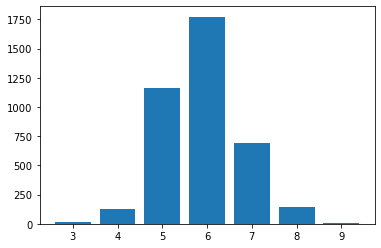

In [2]:
#finding the frequency of each number
y_train_len = len(y_train)
y_test_len = len(y_test)

y_train_vals, y_train_freq = np.unique(y_train, return_counts = True)
print(y_train_freq)
print(y_train_vals)
plt.bar(y_train_vals,y_train_freq)

HANDIN 2

In [3]:
#finding the average = sum(y)/N
y_train_average = np.divide(np.dot(y_train_vals,y_train_freq),y_train_len)

#mean squared error
#y_i - mean
training_difference = np.subtract(y_train, y_train_average)
test_difference = np.subtract(y_test, y_train_average)

#(y_i - mean)^2
training_difference_squared = np.dot(training_difference, training_difference)
test_differnce_squared = np.dot(test_difference, test_difference)

#((y_i - mean)^2)/n where n = len(y)
#this is the mean squared error
training_mse = np.divide(training_difference_squared,y_train_len)
test_mse = np.divide(test_differnce_squared, y_test_len)

print(test_mse)

test = np.std(y_train)
print(test)
print(training_mse)

0.8138573000045539
0.8813496687751756
0.7767772386501112


HANDIN 3

In [4]:
def meanSqErr(mat1,mat2):
    difference = np.subtract(mat1,mat2)
    squared = np.dot(difference,difference)
    final = np.divide(squared,len(mat1))
    
    return final

#values are standardised as follows
#x' = (x - mean) / standard_deviation
def standardise(X_train,X_test):
    X_train, X_test = (X_train.T,X_test.T)
    for i in range(len(X_train)):
        avg = np.average(X_train[i])
        X_train[i] -= avg
        X_test[i] -= avg
        
        std = np.std(X_train[i])
        X_train[i] /= std
        X_test[i] /= std
                   
    return(X_train.T, X_test.T)

#X_train_std, X_test_std = standardise(X_train,X_test)

def linearRegression(trainingData, testingData):
    
    X_train, y_train, N_train = trainingData
    X_test, y_test, N_test = testingData
    
    X_train, X_test = standardise(X_train, X_test)
    
    #adding w0
    ones_vector_train = [[1] for i in range(N_train)]
    ones_vector_test = [[1] for i in range(N_test)]
    
    #add ones vectors to input data to get 12 features
    X_train = np.hstack((ones_vector_train,X_train))
    X_test = np.hstack((ones_vector_test,X_test))
    
    #calculate weights using least squares estimate formula
    #given in the notes
    w = np.matmul(np.matmul(inv(np.matmul(X_train.T,X_train)),X_train.T),y_train)
    
    #error calc
    trainErr = meanSqErr(y_train,np.matmul(X_train,w))
    testErr = meanSqErr(y_test,np.matmul(X_test,w))
    
    return trainErr, testErr

trainingData = (X_train, y_train, N_train)
testingData = (X_test, y_test, N_test)

trainErr, testErr = linearRegression(trainingData, testingData)
print("training error is " + str(trainErr))
print("test error is " + str(testErr))

training error is 0.5639996173941926
test error is 0.5607292042283463


HANDIN 4

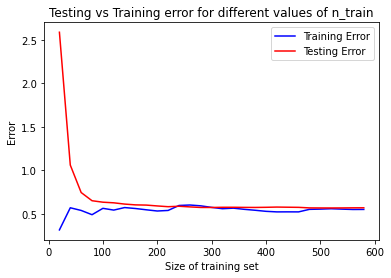

In [7]:
def graph(errors):
    x = range(20, 600, 20)
    trainErrs = [error[0] for error in errors]
    testErrs = [error[1] for error in errors]
    
    plt.plot(x,trainErrs, color = "blue", linewidth = 1.5,label = "Training Error")
    plt.plot(x,testErrs, color = "red", linewidth = 1.5, label = "Testing Error")
    plt.xlabel("Size of training set")
    plt.ylabel("Error")
    plt.title("Testing vs Training error for different values of n_train")
    plt.legend()
    
    plt.show()
    
def regressionUpUntil(X, y, n_train, n_test):
    X_train = X[:n_train]
    y_train = y[:n_train]
    X_test = X[n_train:]
    y_test = y[n_train:]
    
    trainingData = (X_train, y_train, n_train)
    testingData = (X_test, y_test, n_test)
    return linearRegression(trainingData, testingData)
    
errors = [regressionUpUntil(X, y, n_train, N-n_train) for n_train in range(20,600,20)]
graph(errors)

In [ ]:
Since the curves approach each other then plateau at a very low error then the bias is suitable